In [1]:
#Import libraries
import numpy as np
import pandas as pd
import seaborn as sbn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import Dataset
dataset = pd.read_csv("IRIS.csv")
print(dataset.head())

   sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa


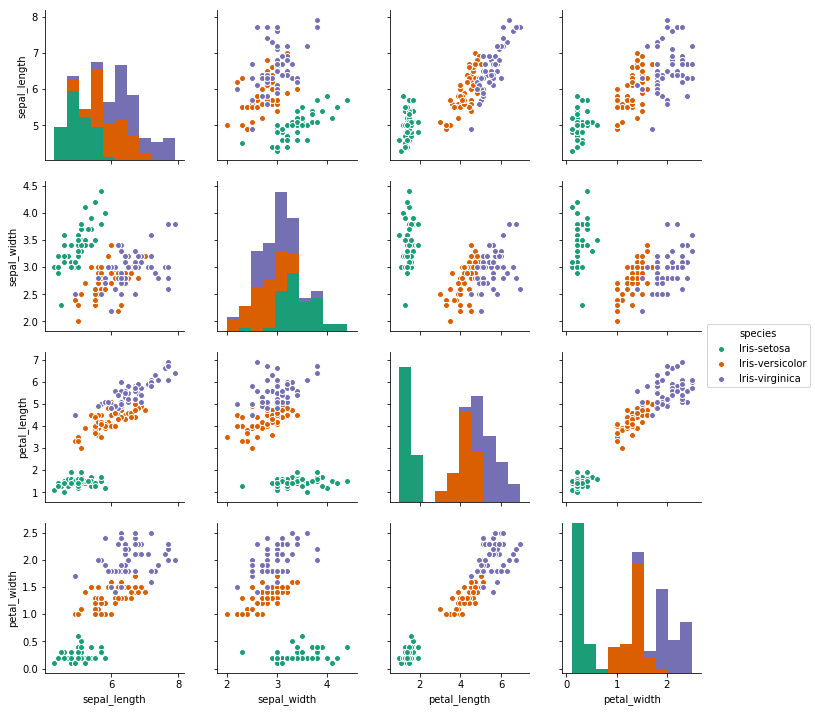

In [3]:
#Display the pair plots of each feature against all other features
#so as to analyse the distribution and easily separable category
sbn.pairplot(dataset,hue="species",palette="Dark2")

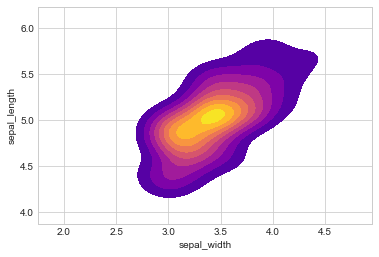

In [4]:
#Kernel density estimation plot of 
#sepal_length vs sepal_width of setosa species
sbn.set_style("whitegrid")
data_setosa = dataset[dataset["species"] == "Iris-setosa"]
data_setosa.head()
sbn.kdeplot(data_setosa["sepal_width"],data_setosa["sepal_length"],shade=True,cmap="plasma",shade_lowest=False)

In [5]:
#Separate the independent variables and dependent variable
x = dataset.iloc[:,: -1].values
y = dataset.iloc[:,4:5].values

In [6]:
#Encode the categorical dependent variable so as to run K-NN
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

labelencoder_y = LabelEncoder()
y = labelencoder_y.fit_transform(y)

C:\Users\Ankit Singh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [7]:
#Create training and test sets in the ratio 80:20, respectively
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 70)
y_test

array([0, 2, 1, 1, 2, 1, 0, 0, 0, 1, 1, 1, 2, 1, 0, 1, 0, 0, 2, 2, 1, 2,
       1, 2, 1, 2, 1, 0, 0, 0], dtype=int32)

In [8]:
#Import k- Nearest Neighbours Classifier and train it
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = "minkowski",p = 2)
classifier.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
#Predictions for test set
y_pred = classifier.predict(x_test)

In [10]:
#Inverse transform the dependent variable as encoding abstracts intuitive information
y_pred = labelencoder_y.inverse_transform(y_pred)
y_test = labelencoder_y.inverse_transform(y_test)

C:\Users\Ankit Singh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Ankit Singh\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [11]:
print(y_pred)
print(y_test)

['Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa']
['Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor'
 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa'

In [12]:
#Confusion matrix to indicate actual vs expected classification
from sklearn.metrics import confusion_matrix,classification_report

cm = confusion_matrix(y_pred,y_test)
print(cm)

[[10  0  0]
 [ 0 12  0]
 [ 0  0  8]]


In [13]:
#Details to analyse how good is the classifier
print(classification_report(y_pred,y_test))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        12
 Iris-virginica       1.00      1.00      1.00         8

    avg / total       1.00      1.00      1.00        30

